In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# See https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#documentacion
deceases = pd.read_csv("https://momo.isciii.es/public/momo/data")

In [74]:
#Bad spanish dataset
#infections = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", encoding='iso-8859-1')

In [75]:
# See https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
infections = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")


In [76]:
infections.describe()

,day,month,year,cases,deaths,popData2018
count,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,1.430400e+04
mean,16.377509,3.101038,2019.995363,228.899654,16.500415,5.494123e+07
std,9.000564,1.270264,0.067937,1596.065098,124.433050,1.831232e+08
min,1.000000,1.000000,2019.000000,-1430.000000,0.000000,1.000000e+03
25%,9.000000,2.000000,2020.000000,0.000000,0.000000,2.789533e+06
50%,17.000000,3.000000,2020.000000,1.000000,0.000000,9.942334e+06
75%,24.000000,4.000000,2020.000000,30.000000,1.000000,3.717239e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [77]:
infections.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,02/05/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
1,01/05/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
2,30/04/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
3,29/04/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
4,28/04/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia


In [78]:
deceases.describe()

,cod_ine_ambito,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
count,170772.000000,179760.000000,179760.000000,179760.000000,179760.000000,179760.000000,179760.000000
mean,10.000000,36.803393,36.778783,36.833974,35.921714,27.188894,47.411286
std,5.477242,112.128097,112.094995,112.165048,107.235391,94.675543,124.773567
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,6.000000
50%,10.000000,8.000000,8.000000,8.000000,8.000000,2.690000,15.000000
75%,15.000000,27.000000,27.000000,27.000000,26.500000,16.105000,38.620000
max,19.000000,2466.000000,2466.000000,2466.000000,1323.000000,1172.280000,1689.270000


In [79]:
deceases.head()

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-14,1120,1120.0,1120.0,1082.25,980.08,1159.135
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-15,1073,1073.0,1073.0,1081.25,980.08,1155.810
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-16,1047,1047.0,1047.0,1076.00,980.08,1159.910
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-17,1161,1161.0,1161.0,1078.00,975.94,1159.220
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-18,1088,1088.0,1088.0,1073.00,957.69,1168.430


In [80]:
deceases[deceases.ambito=='ccaa'].cod_ambito.value_counts()

VC    8988
GA    8988
CN    8988
EX    8988
MD    8988
MC    8988
AR    8988
CT    8988
ML    8988
AS    8988
PV    8988
CE    8988
IB    8988
NC    8988
CM    8988
CB    8988
RI    8988
CL    8988
AN    8988
Name: cod_ambito, dtype: int64

In [104]:

def showDeceases(df, location='CM', from_date='2020-03-01', sex='all', age='all'):
    prov = 'CM'
    date = '2020-03-01'

    df = df[df.cod_ambito==prov]
    df = df[df.cod_gedad==age]
    df = df[df.cod_sexo==sex]
    df = df[df['fecha_defuncion']>=date]

    dates = list(df.fecha_defuncion.unique())
    dates.sort(reverse=False)
    
    pal = sns.cubehelix_palette(len(df))
    rank = df['defunciones_observadas'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638

    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.barplot(data=df,
                x='fecha_defuncion',
                y='defunciones_observadas',
                label='Observed deceases',
#                palette=np.array(pal[::1])[rank],
                color='lightblue',
                order=dates,
                ax=ax)
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas',
                 label='Expected deceases',
                 markers=True,
                 dashes=False,
                 color='gray'
                )
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas_q01',
                 label='Expected deceases (inf)',
                 markers=True,
                 dashes=True,
                 color='m'
                )
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas_q99',
                 label='Expected deceases (sup)',
                 markers=True,
                 dashes=True,
                 color='r'
                )
    plt.xticks(rotation=90)
    plt.title("Deceases {} since {} - Age {} Sex {}".format(location, from_date, age, sex))
    plt.legend()
    plt.show()

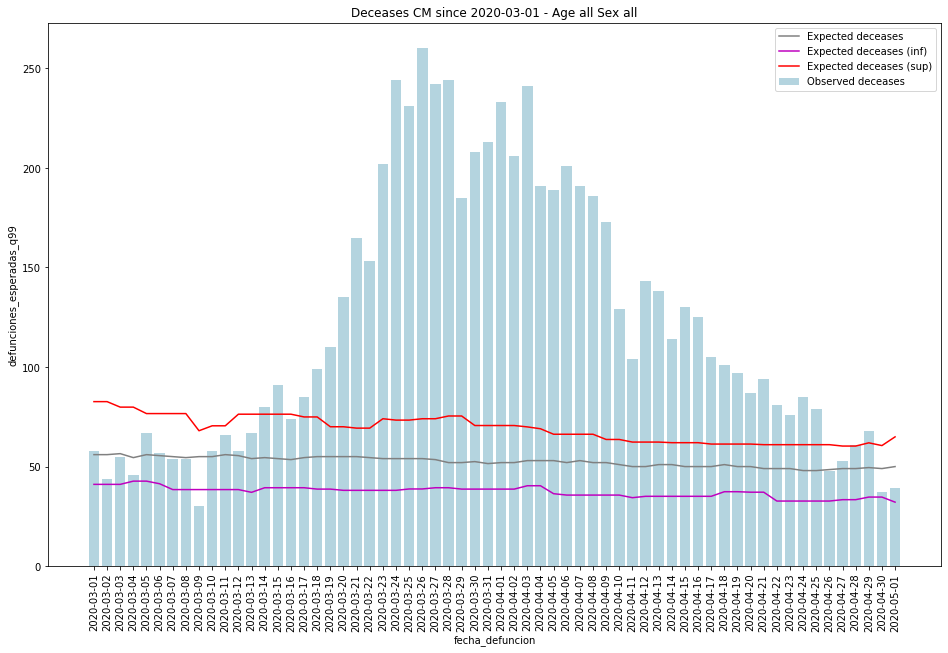

In [105]:
showDeceases(deceases)

In [91]:
infections.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,02/05/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
1,01/05/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
2,30/04/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
3,29/04/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
4,28/04/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia


In [93]:
infections.describe()

,day,month,year,cases,deaths,popData2018
count,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,1.430400e+04
mean,16.377509,3.101038,2019.995363,228.899654,16.500415,5.494123e+07
std,9.000564,1.270264,0.067937,1596.065098,124.433050,1.831232e+08
min,1.000000,1.000000,2019.000000,-1430.000000,0.000000,1.000000e+03
25%,9.000000,2.000000,2020.000000,0.000000,0.000000,2.789533e+06
50%,17.000000,3.000000,2020.000000,1.000000,0.000000,9.942334e+06
75%,24.000000,4.000000,2020.000000,30.000000,1.000000,3.717239e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [108]:
infections.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [137]:
infections['date'] = pd.to_datetime(infections['dateRep'], infer_datetime_format=True).apply(
    lambda x: str(x).split(" ")[0])

In [150]:
def showInfections(df, location='ES', from_date='2020-03-01', date_limit=None):
    if not date_limit:
        from datetime import date
        date_limit = date.today().strftime("%Y-%m-%d")

    date = '2020-03-01'
    if location:
        df = df[df.geoId==location]
    df = df[df['date']>=date]
    df = df[df['date']<=date_limit]

    dates = list(df.date.unique())
    dates.sort(reverse=False)
    
    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.barplot(data=df,
                x='date',
                y='cases',
                label='Observed infections',
                color='lightblue',
                order=dates,
                ax=ax)
    sns.lineplot(data=df,
                 x='date',
                 y='deaths',
                 label='Deaths',
                 markers=True,
                 dashes=True,
                 color='m'
                )
    plt.xticks(rotation=90)
    plt.title("Infections {} since {}".format(location, from_date))
    plt.legend()
    plt.show()

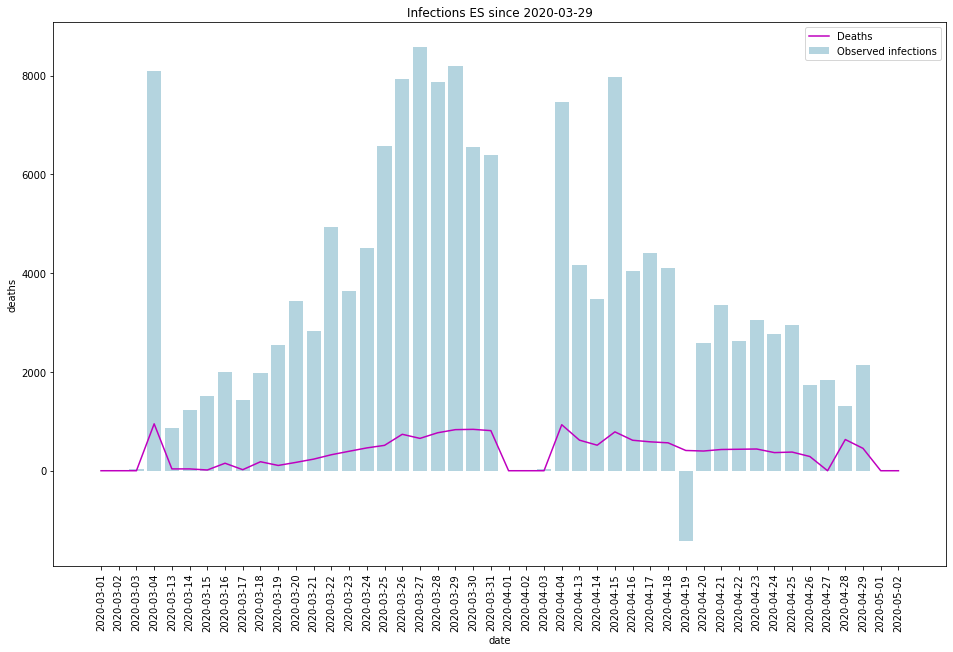

In [151]:
showInfections(infections, location='ES', from_date='2020-03-29')